# Learning From user interactions
> Inside Spotify's Recommender System.

- toc: true 
- badges: true
- comments: true
- sticky_rank: 2
- categories: [Reinforcement learning]



`Note`: Using Spotify as the running example, this article gives a whirlwind tour of the key challenges in building a personalized recommender system at scale. I choose Spotify as it seemed to me to have gotten many things right in terms of leveraging machine learning to give magical user experience. The aim is to give a glimpse of the possible algorithms(machine learning) behing such a system.

Ref: https://sites.google.com/view/kdd20-marketplace-autorecsys/

Market Places

`UBER EATS`

3 sided platform

Eaters : Discover and order food.
Restaurants: Sales channel to find customers
Delivery-partners: Earn income by picking up food from restaurants and delivering it to eaters.

objectives:

- Eater conversion rate
- Increase Diversity
- Exposure of restaurants
- Delivery Times

`On-Demand Delivery Solutions`(Instacart/Big-basket)

- Users : Quick delivery,best prices, reliable merchants,fresh items
- Merchants: matching quality, exposure, minimize wastage
- Delivery partners: efficient drop location planning, regularity in jobs, earnings per partner.

`AirBnb`

objectives:

- Different objectives for low intent users
- Conversions (search to book)
- No. of bookings per host

`Spotify`

- Artists to Users.

`Funding Circle`

objectives:
- Quick and easy access to loans
- Return on investment
- Increase borrowers
- Lower loan default cases.



Types of Objectives

Estimated via Static Computation

- Relevance (user,item similarity),Familiarity (Has he/she seen/interacted before),Affinity(every time we show this add,user goes away-negative affinity)

Predicted via Learned Models

- p(return): If we show this now, what is the probability that the user returns to the platform in `n` days.
- p(click)
- p(consume)

Factual

- Margin based.  
- Revenue based.

Interplay between Objectives

- Correlated.
- Neutral.
- Anti-correlated.

We can take log-data and measure the correlation between our metrics - Off Policy evaluation(debiasing) b. Randomized trials.

Consider a scenario of showing playlists to users.

- Relevance(to user)
- Fairness/diversity( of supplier )

Now with 5 objectives:



`Pareto Optimality`

1. Multi-Task Learning

- Hard parameter sharing
- Soft parameter sharing (with regularization)
- We don't know how relevant are tasks(sluice networks): Adaptive sharing. Inductive bias: enforce division of labour.

`NOTE`: Here we have prespecified weights to each of the tasks. This doesn't gaurentee pareto optimal solution.

2. Scalarization : Predict multiple things and combine them.

Say we have two objectives : a. Relevance b. Fairness

Have two models and aggregate them as argmax $(1-\beta)\phi(u,s) + \beta \psi(s)$.
Eg: Sum, Weighted Sum, Ordered Weighted avg.

On a global scale i don't want to do multi-objective outputs. Treat each session independently(group them) ,and optimize one objective on some while other on others.

3. Multi-task as multiobjective optimization

Have learnable weights and explore the pareto front. Direction that improves all objectives.


Candidate generation : bunch of possible curated playlists to the user.

Now show which playlist to the user: Multi-Armed bandit(contextual) with multi-objective.

- Maximizing click through rate
- Maximizing number of songs played
- Max stream time
- Diversity.

Multiobjective RL

 - Scalirized approach: Find a single policy that optimizes a combination of the rewards. Which reward combination is preferable at which state ?
 
 - Pareto Approach

Now that we have a multi-objective model, how can we leverage our understanding about various stake-holders.

User Understanding Implications:

1. Some users are receptive while some are less so: Helps avoiding user dissatisfaction.

2. User intent: Better target content, especially from other stakeholder objectives. 

User groups: Some users like content diversity and some don't

- Specialists 
- Generalists

Understanding Intent(Multilevel modeling): When there is no explicit search, understanding what the user is looking for is very hard but also very useful to customize the homepage/recommender system.

Example:

Passively listening

 - find music to play in the background
 - quickly access their playlist, play music that matches their mood.
 
Actively Engaging
- To discover new music or explore new artists.


`Take home`: We have multiobjective metrics, there once we have user level information, then we can choose to ignore/overdrive some of them : This user is expecially looking to find new artists(actively engaging)-> so we can overdrive diversity metrics.

Spillover effects across Suppliers: Other artists benefit by the virtue of being on the platform.(or otherwise)

- New track releases help not only the focal artist but also other related artists.

Q1: Let's say we develop a composite metric, should we just optimize for that ?

ans: Element of user receptivity, I can keep satisfaction neutral and increase diversity metric by targeting these users - Scalarized approach is lacking in detail.Thus we might be leaving some money on the table. But now take a multi-objective approach: It has access to all objectives specifically. Say for a session with receptive user, we choose to focus on listen time but not on diversity.

`Content Understanding`

1. Same reward for playtime on a. Sleep playlist b.Any other playlist is not a good idea. Consumption time of sleep playlist is longer than average.

2. Jazz listeners tend to listen jazz playlists more.

User & Content aware reward:

`Query understanding`

Non-focused queries,broad intent queries vs focused ones.
    

Industry Applications

- Recommendations with capacity constraints.
- 

Challenges for traditional recommender system(Matrix factorization based batch)

1. Scarce feedback
2. Dynamic catalog
3. Non Stationary member base
4. Time Sensitivity
 - Member interests change 
 - Content popularity changes
 - respond quickly.


Bandits as an alternative to [A/B testing](https://blog.insightdatascience.com/multi-armed-bandits-for-dynamic-movie-recommendations-5eb8f325ed1d)

Exploration Strategies

- Naive exploration
- Optimism in the face of uncertainty (UCB)
- Probability Matching (Thompson Sampling)

Goals/Challenges

1. Identify user's tastes and give personalized recommendations.

Why: Long term user satisfaction is the goal. Eventually, we should aim to formalize `long term user satisfaction`  and benchmark algorithms.

Input: 

CRM: Counterfactual risk minimization.

Now, in this Markdown cell, I'll include the same text I did before:

For demonstration purposes, I'll take the liberty of citing a couple of my recent papers, namely the first SignalTrain paper{% cite signaltrain %} and the new one by Billy Mitchell.

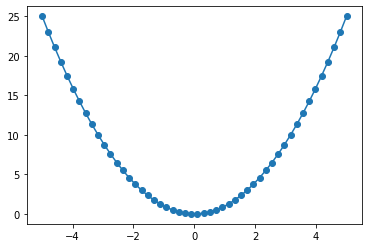

In [4]:
# and a little more code
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, num=50)
y = x**2
plt.plot(x, y, 'o-')


Cited as:

```
@article{varmakRecsys,
  title   = "Learning From user interactions:Inside Spotify's Recommender System.",
  author  = "Vinay Varma K",
  journal = "https://vinayvarma.work",
  year    = "2022",
  url     = "https://vinayvarma.work/reinforcement%20learning/2022/05/23/Recommender-systems.html"
}```

And now we wrap it up with the same bibliography inclusion as the previous post...

## References
{% bibliography --cited %}